# Importing dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../data/train_users_2.csv', parse_dates=[1,3])
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaT,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaT,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaT,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


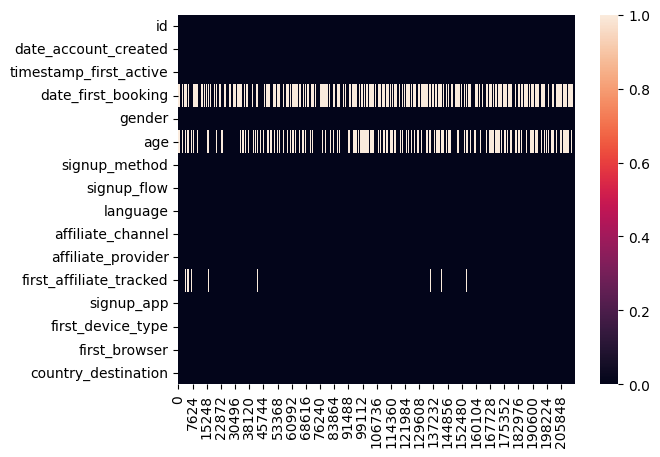

In [8]:
sns.heatmap(df.isna().T);

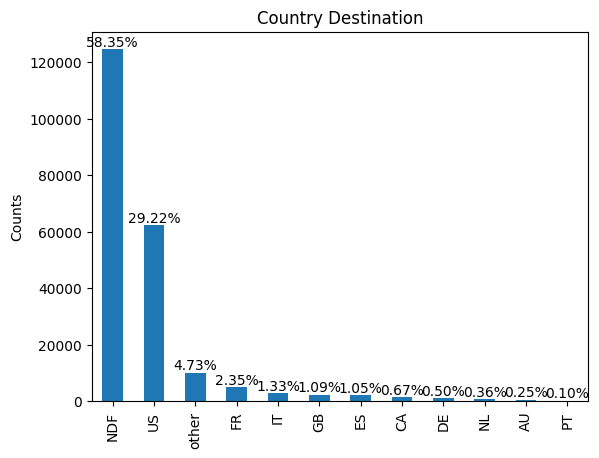

In [9]:
country_counts = df.country_destination.value_counts()
total_counts = country_counts.sum()

ax = country_counts.plot(kind='bar')

for i, count in enumerate(country_counts):
    percentage = count / total_counts * 100
    ax.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.title('Country Destination')
plt.ylabel('Counts')

plt.show()

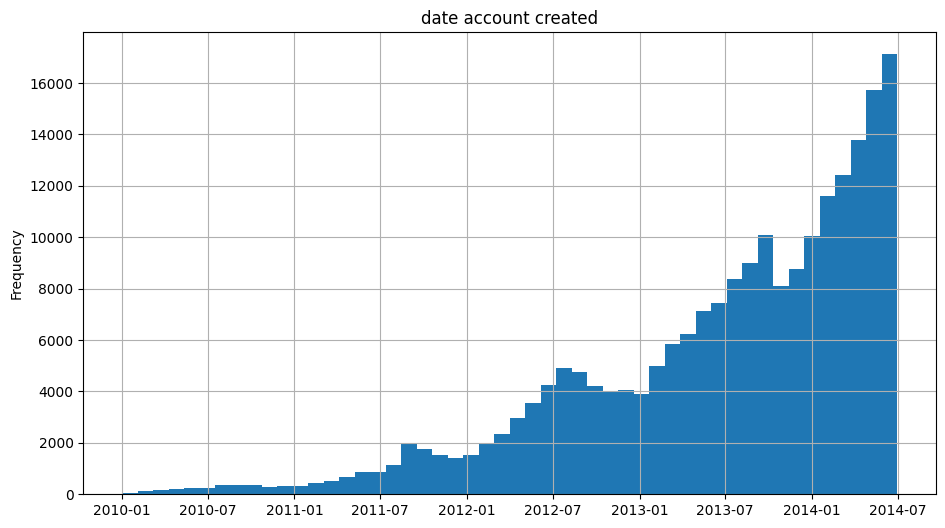

In [10]:
df['date_account_created'].hist(bins=50, figsize=(11,6));


plt.ylabel('Frequency');
plt.title('date account created');

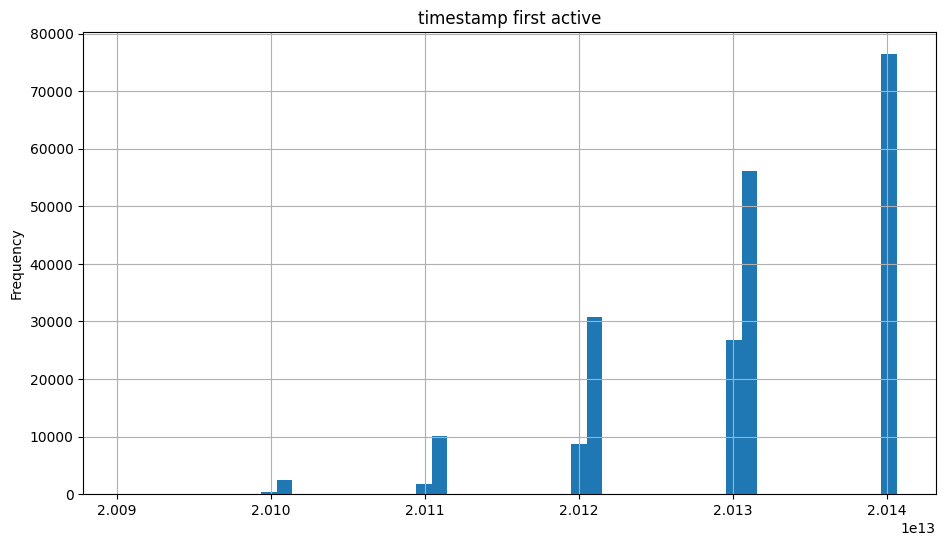

In [11]:
df['timestamp_first_active'].hist(bins=50, figsize=(11,6));
plt.ylabel('Frequency');
plt.title('timestamp first active');

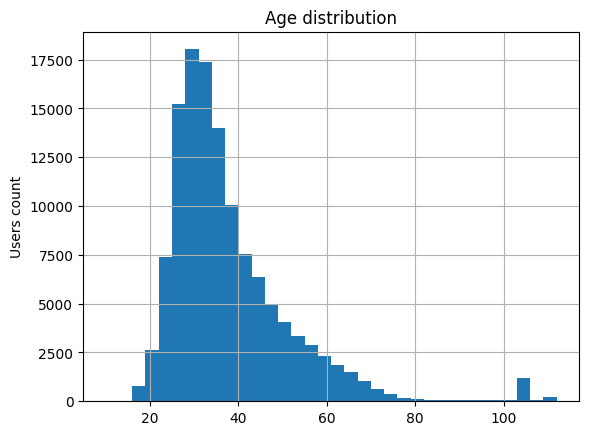

In [12]:
binwidth = 3
df.age.dropna().hist(range=(10, 110),bins=range(10, 110 + binwidth, binwidth));
plt.rcParams["figure.figsize"] = (10,7)
plt.title('Age distribution')
plt.ylabel('Users count');

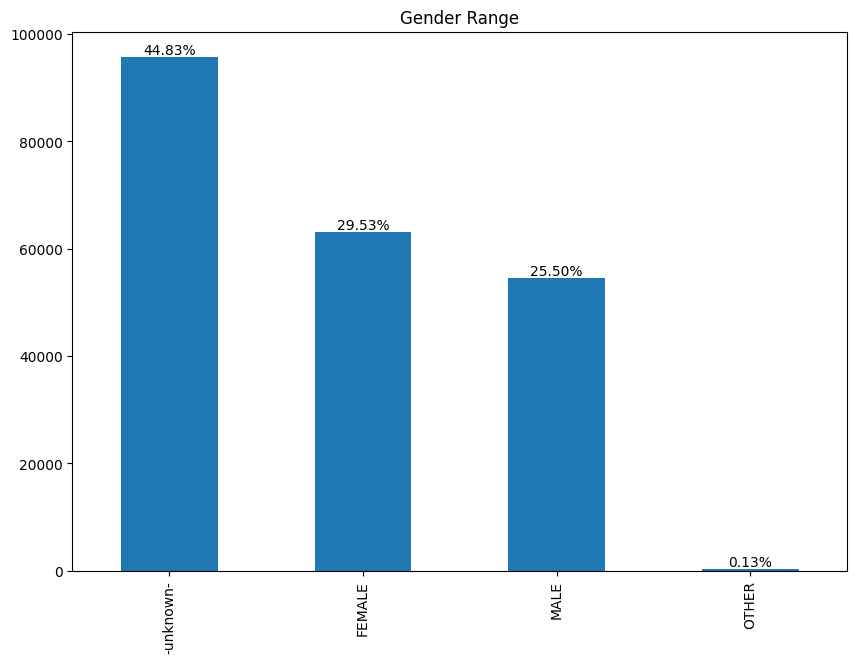

In [13]:
gender_counts = df.gender.value_counts()
total_counts = gender_counts.sum()

ax = gender_counts.plot(kind='bar', title='Gender Range')

for i, count in enumerate(gender_counts):
    percentage = count / total_counts * 100
    ax.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()

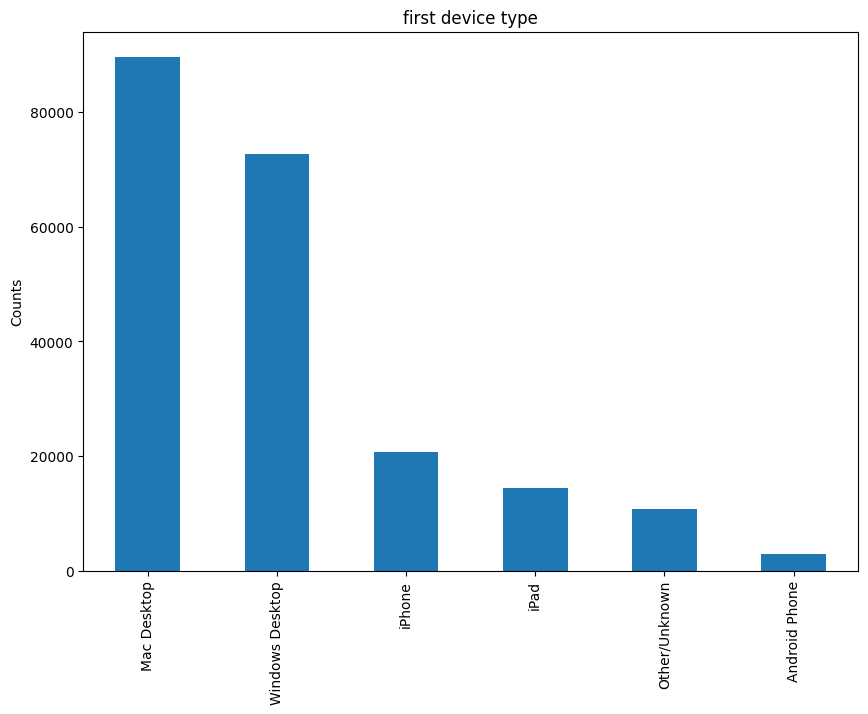

In [14]:
df.first_device_type.value_counts()[:6].plot(kind='bar', title='first device type');
plt.ylabel('Counts');

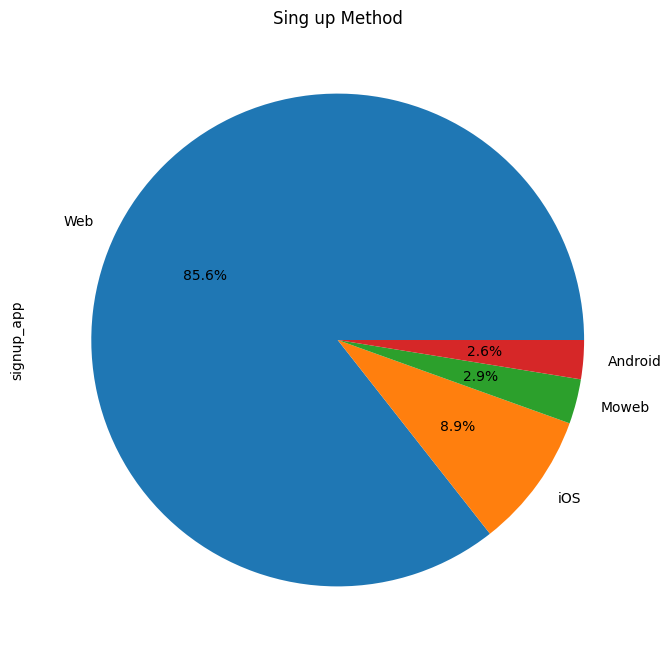

In [15]:
df.signup_app.value_counts().plot(kind='pie', figsize=(10,8), title='Sing up Method', autopct='%1.1f%%');

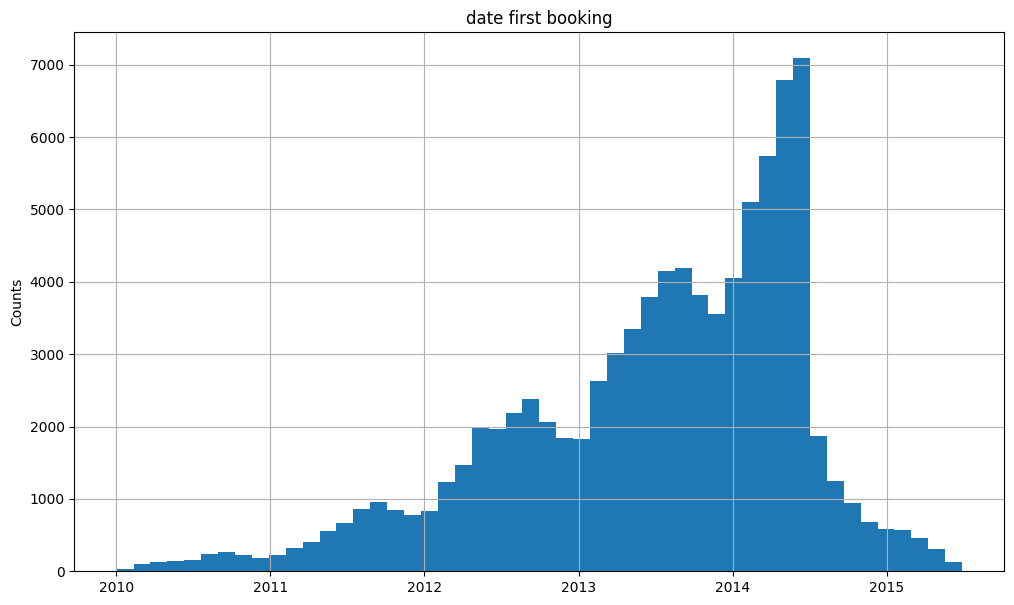

In [16]:
df['date_first_booking'].hist(bins=50, figsize=(12,7));
plt.ylabel('Counts');
plt.title('date first booking');

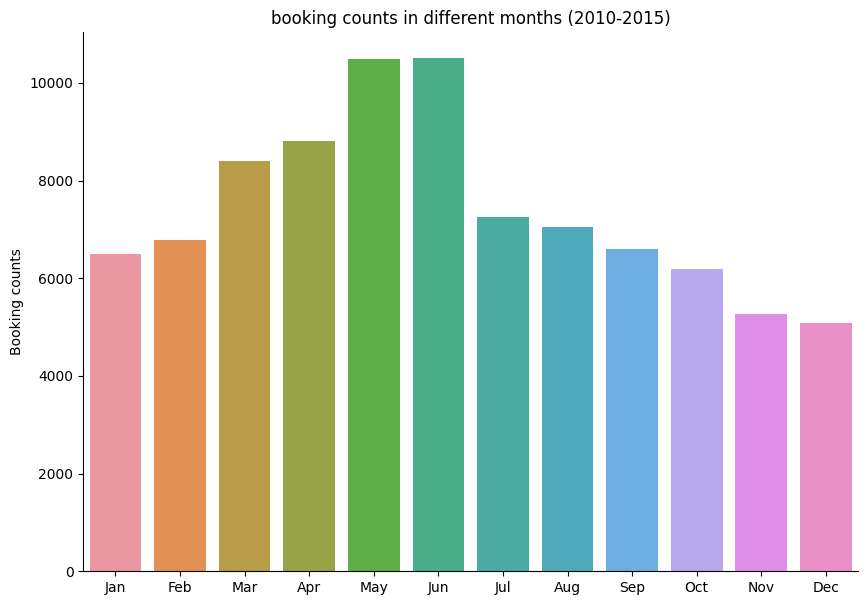

In [17]:
months = []
for date in df.date_first_booking:
    months.append(date.month)
months = pd.Series(months)


sns.barplot(x = months.value_counts().index, y=months.value_counts().values, order=range(1,13))
plt.title('booking counts in different months (2010-2015)')
plt.ylabel('Booking counts')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sns.despine()

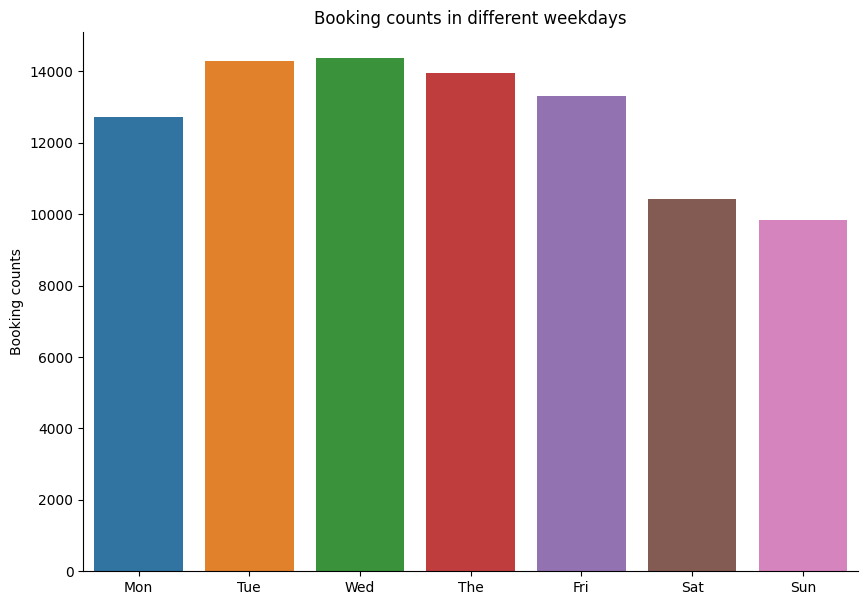

In [18]:
weekdays = []
for date in df.date_first_booking:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

sns.barplot(x=weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0, 7))
plt.title('Booking counts in different weekdays')
plt.ylabel('Booking counts')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'The', 'Fri', 'Sat', 'Sun'])
sns.despine()

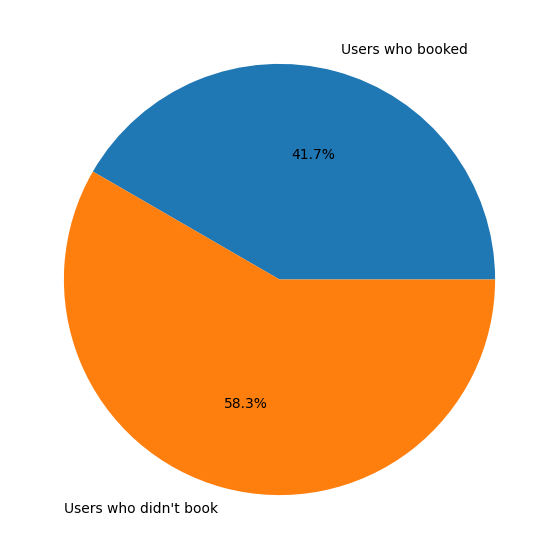

In [22]:
# In this cell, I tried to see the percentage of users who booked other destination than US

dest = df.country_destination
not_booked = len(dest[dest=='NDF'])
total_booked = len(dest[dest!='NDF'])

plt.pie([total_booked, not_booked], labels=['Users who booked', 'Users who didn\'t book'], autopct='%1.1f%%');

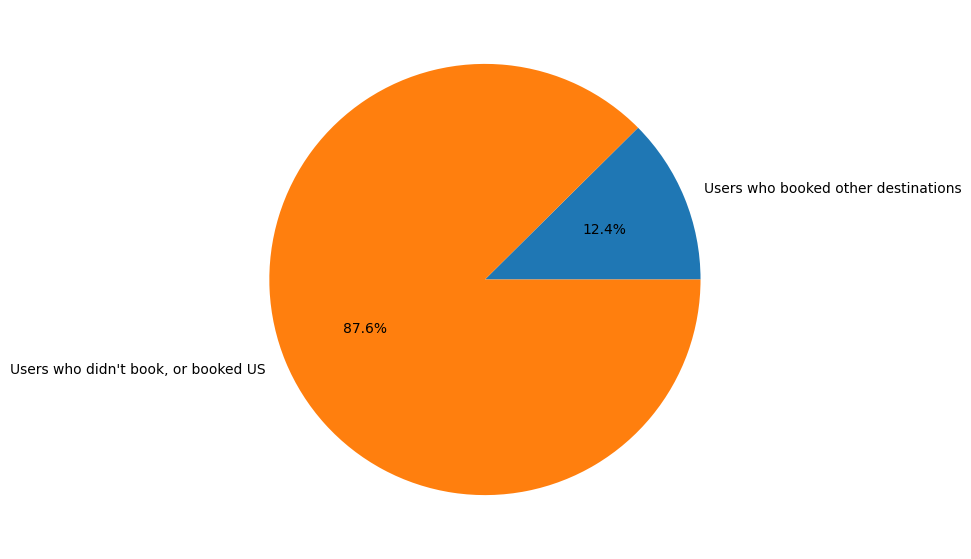

In [26]:
dest = df.country_destination

not_booked_use = len(dest[dest=='US']) + len(dest[dest=='NDF'])
other_dest = len(dest[(dest!='NDF') & (dest!='US')])

plt.pie([other_dest, not_booked_use], labels=['Users who booked other destinations', 'Users who didn\'t book, or booked US'], autopct='%1.1f%%')
plt.show()